Importações necessárias

In [1]:
#!pip install ultralytics # Necessário rodar caso seja a primeira vez
from ultralytics import YOLO
from IPython.display import Image
import torch

C:\Users\Fernando Buligon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


Verificando se a GPU está disponível, usar a CPU torna o processo bem mais lento

In [2]:
print(torch.cuda.is_available()) # True -> Disponível, False -> Não disponível

False


Carregamento do modelo de classificação YOLO11

In [3]:
model = YOLO("yolo11n-cls.pt")

Carregamento da base de dados.

É necessário que esteja nesse formato:


```
dataset/
| -- train/
|    | -- class1/
|    |    | -- img01.png
|    |    | -- ...
|    | -- class2/    
|    |    | -- img01.png
|    |    | -- ...
| -- test/
|    | -- class1/
|    |    | -- img01.png
|    |    | -- ...
|    | -- class2/    
|    |    | -- img01.png
|    |    | -- ...
| -- val/ (opcional)
|    | -- class1/
|    |    | -- img01.png
|    |    | -- ...
|    | -- class2/    
|    |    | -- img01.png
|    |    | -- ...
```



In [4]:
data = "classificacao" # Caminho para o dataset

Componentes do model.train:

*   data: Caminho para a base de dados;
*   epochs: Número de vezes que o modelo vai fazer uma passagem completa pelo conjunto de dados
*   project: Nome do diretório onde vão ser armazenados os resultados (caso não exista, é criado automaticamente)
*   patience: Caso não haja melhorias nesse número de épocas, o modelo pode parar antecipadamente;
*   name: Nome da pasta onde vão ser guardados os resutados do treino atual, cada vez que rodar é criado uma nova;
*  plots: Geração e armazenamento de gráficos de métricas do treino e da validação;
*  dropout: Desativa alguns neurônios aleatórios, reduzindo o sobreajuste;

Clicando [aqui](https://docs.ultralytics.com/pt/modes/train/#train-settings) é possível encontrar todos os componentes disponíveis e seus respectivos detalhes.





In [5]:
results = model.train(data=data, epochs=15,imgsz=300, project="resultados", patience=5, name="treino", plots=True, dropout=0.5)

New https://pypi.org/project/ultralytics/8.3.90 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.74  Python-3.11.9 torch-2.6.0+cpu CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
engine\trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=classificacao, epochs=15, time=None, patience=5, batch=16, imgsz=300, save=True, save_period=-1, cache=False, device=None, workers=8, project=resultados, name=treino, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.5, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fa

train: Scanning C:\Users\Fernando Buligon\Documents\Projeto Final - LAMIA\classificacao\train... 2890 images, 0 corrupt: 100%|██████████| 2890/2890 [00:09<00:00, 317.99it/s]


train: New cache created: C:\Users\Fernando Buligon\Documents\Projeto Final - LAMIA\classificacao\train.cache


val: Scanning C:\Users\Fernando Buligon\Documents\Projeto Final - LAMIA\classificacao\test... 730 images, 0 corrupt: 100%|██████████| 730/730 [00:02<00:00, 354.15it/s]


val: New cache created: C:\Users\Fernando Buligon\Documents\Projeto Final - LAMIA\classificacao\test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000455, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to resultados\treino
Starting training for 15 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:20<00:00,  1.13it/s]

                   all      0.867       0.99



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]

                   all      0.978          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:19<00:00,  1.17it/s]

                   all      0.979          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:19<00:00,  1.18it/s]

                   all      0.988          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:19<00:00,  1.20it/s]

                   all      0.989      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:20<00:00,  1.14it/s]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:20<00:00,  1.14it/s]

                   all      0.988          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


      10/15         0G     0.2269         10        320: 100%|██████████| 181/181 [03:41<00:00,  1.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:18<00:00,  1.21it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      11/15         0G     0.2078         10        320: 100%|██████████| 181/181 [03:42<00:00,  1.23s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]

                   all       0.99          1



      Epoch    GPU_mem       loss  Instances       Size


      12/15         0G     0.2004         10        320: 100%|██████████| 181/181 [03:40<00:00,  1.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]

                   all      0.992          1



      Epoch    GPU_mem       loss  Instances       Size


      13/15         0G     0.2015         10        320: 100%|██████████| 181/181 [03:40<00:00,  1.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]

                   all      0.993          1



      Epoch    GPU_mem       loss  Instances       Size


      14/15         0G     0.1959         10        320: 100%|██████████| 181/181 [03:40<00:00,  1.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]

                   all      0.995          1



      Epoch    GPU_mem       loss  Instances       Size


      15/15         0G     0.1839         10        320: 100%|██████████| 181/181 [03:40<00:00,  1.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:18<00:00,  1.22it/s]

                   all      0.992          1



15 epochs completed in 1.031 hours.
Optimizer stripped from resultados\treino\weights\last.pt, 3.2MB
Optimizer stripped from resultados\treino\weights\best.pt, 3.2MB

Validating resultados\treino\weights\best.pt...
Ultralytics 8.3.74  Python-3.11.9 torch-2.6.0+cpu CPU (AMD Ryzen 5 3500U with Radeon Vega Mobile Gfx)
YOLO11n-cls summary (fused): 112 layers, 1,549,082 parameters, 0 gradients, 3.2 GFLOPs
WARNING  Dataset 'split=val' not found, using 'split=test' instead.
train: C:\Users\Fernando Buligon\Documents\Projeto Final - LAMIA\classificacao\train... found 2890 images in 18 classes  
val: None...
test: C:\Users\Fernando Buligon\Documents\Projeto Final - LAMIA\classificacao\test... found 730 images in 18 classes  


               classes   top1_acc   top5_acc: 100%|██████████| 23/23 [00:16<00:00,  1.36it/s]


                   all      0.995          1
Speed: 0.0ms preprocess, 14.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to resultados\treino


Realizando a predição de uma imagem que estava fora da base de dados

In [6]:
model = YOLO("resultados/treino/weights/best.pt")
teste = model("teste.jpg")
teste[0].show()


image 1/1 c:\Users\Fernando Buligon\Documents\Projeto Final - LAMIA\teste.jpg: 320x320 neolefrin 0.67, decolgen 0.21, biogesic 0.04, bactidol 0.02, abidor 0.02, 32.7ms
Speed: 22.4ms preprocess, 32.7ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 320)


Mostra a loss do treino e da validação

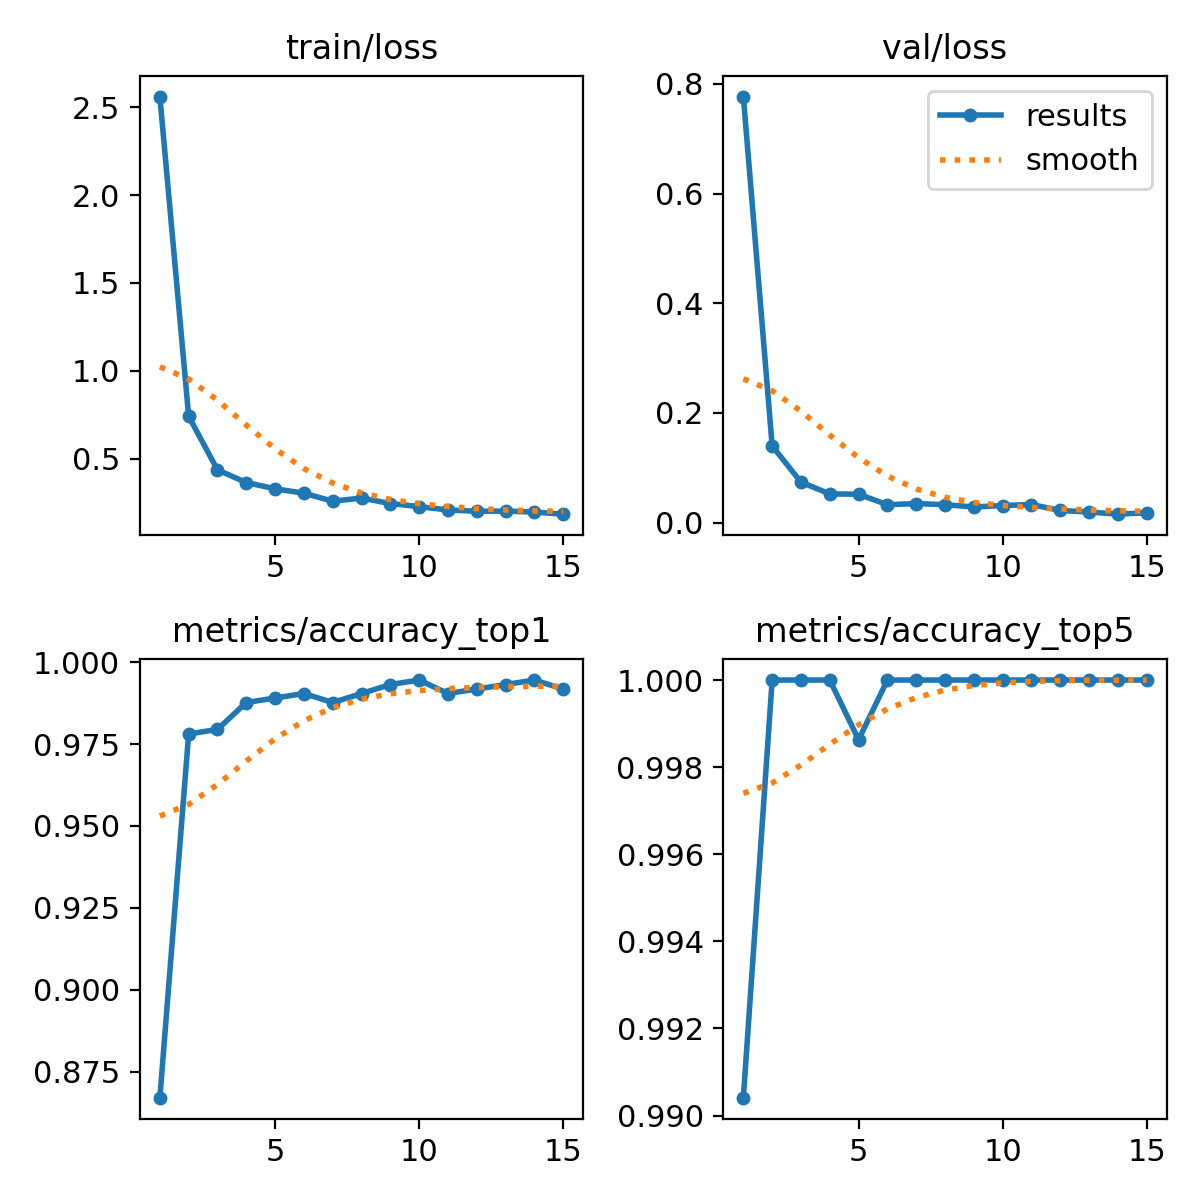

In [7]:
resultados = "resultados/treino/results.png"
display(Image(filename=resultados))

Mostra a matriz de confusão

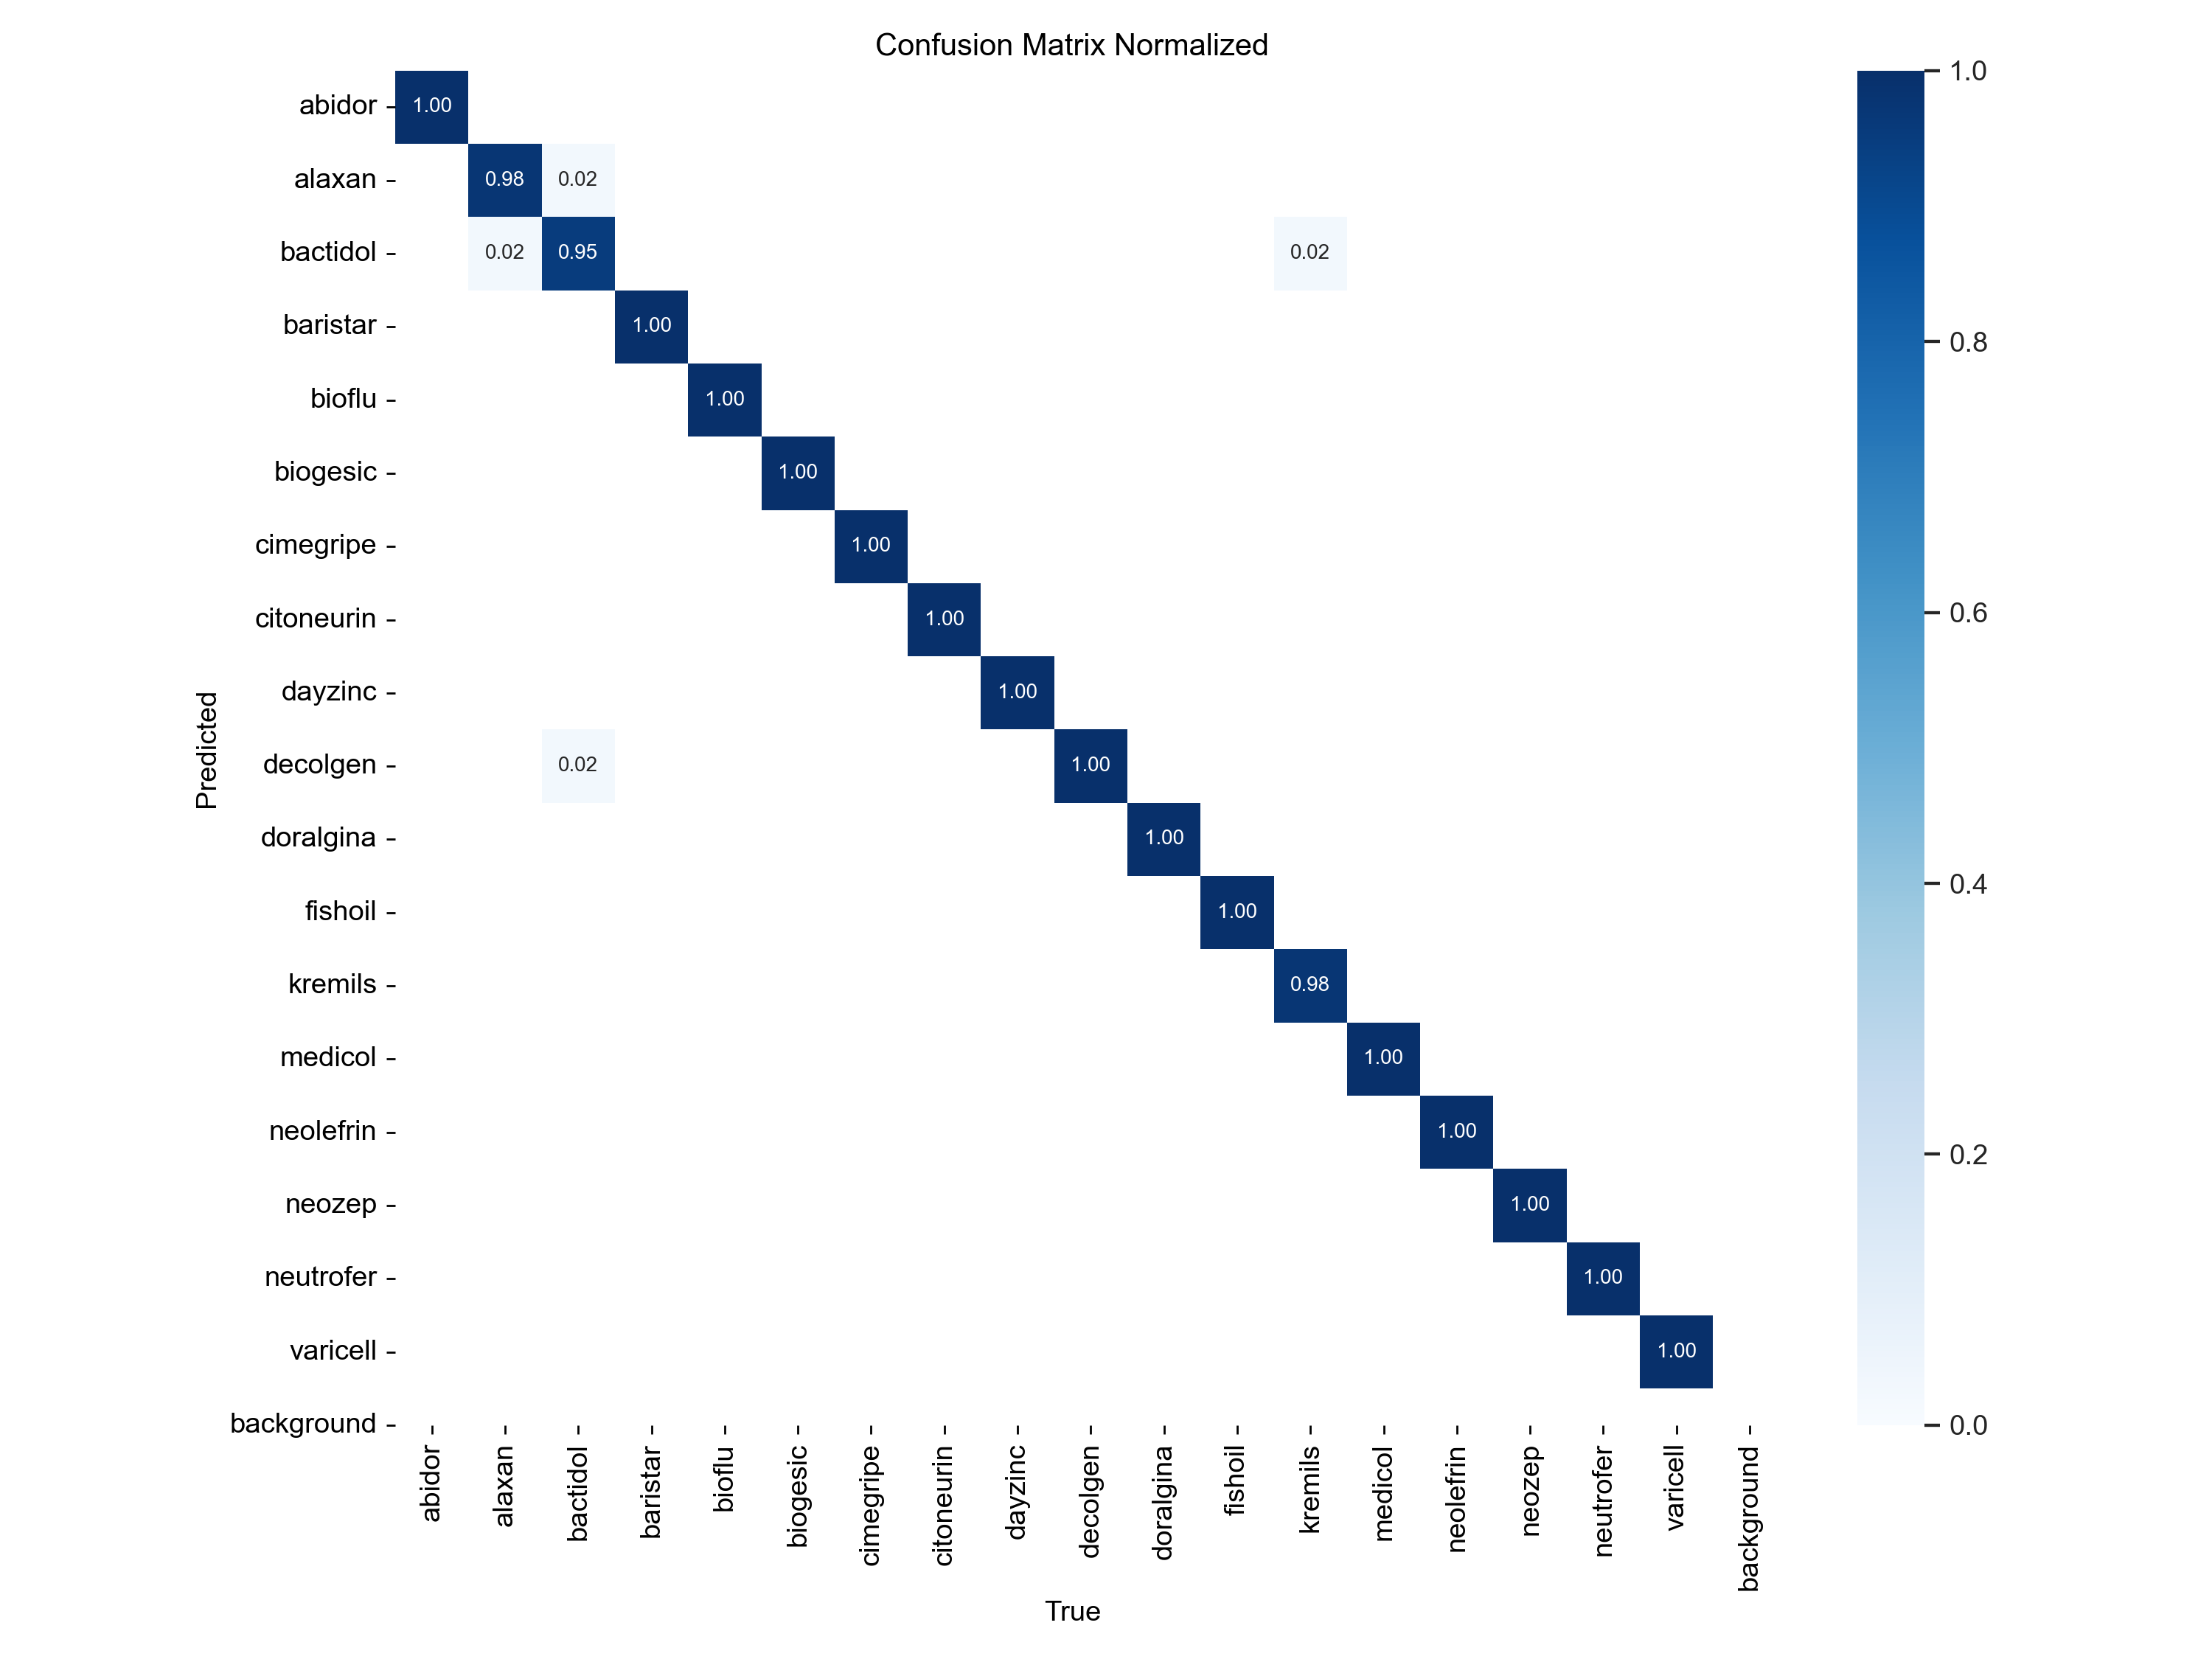

In [8]:
resultados = "resultados/treino/confusion_matrix_normalized.png"
display(Image(filename=resultados))

Inicia a câmera e mostra em tempo real as probabilidades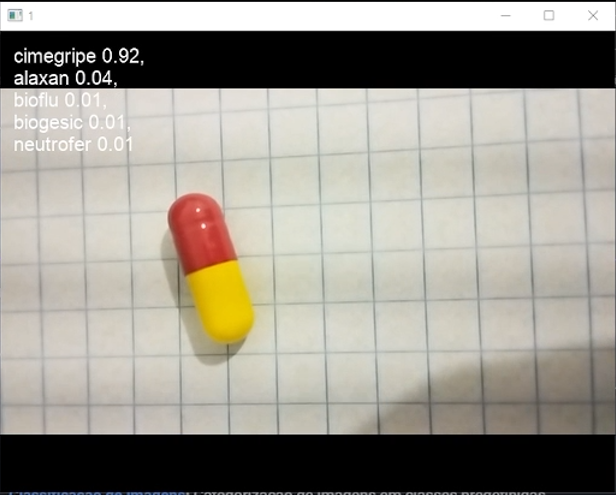

In [ ]:
cam = model(source=1, show=True, conf=0.4, save=True)


1/1: 1... Success  (inf frames of shape 640x480 at 29.97 FPS)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 320x320 bioflu 0.15, dayzinc 0.13, alaxan 0.10, fishoil 0.09, kremils 0.07, 40.3ms
0: 320x320 bioflu 0.15, dayzinc 0.13, alaxan 0.10, fishoil 0.09, kremils 0.07, 33.0ms
0: 320x320 bioflu 0.15, dayzinc 0.13, alaxan 0.10, fishoil 0.09, kremils 0.07, 73.4ms
0: 320x320 bioflu 0.15, dayzinc 0.13, alaxan 0.10, fishoil 0.09, kremils 0.07, 104.0ms
0: 320x320 bioflu 0.15, dayzinc 0.13, alaxan 0.10,

MemoryError: Unable to allocate 300. KiB for an array with shape (320, 320, 3) and data type uint8

: 